# Alcohol consumption per capita

In [11]:
import pandas as pd


import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from constants.countries import highincome_countries
from src import generate_high_income_global_avg_index
from src.plotting import plot_value_per_year_GER_HIC_GLO
from constants.countries import country_code_to_name

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [12]:
DATA_PATH = "../data/raw/"
OUTPUT_PATH = "output/"
alcohol_data_path = DATA_PATH + "alcohol_germany.csv"
VALUE_COLUMN_NAME = "Value"
YEAR_COLUMN_NAME = "Year"

In [13]:
alco_tobacco_df = pd.read_csv(alcohol_data_path)
alco_tobacco_df["Country Name"] = alco_tobacco_df["LOCATION"].map(country_code_to_name)
alco_tobacco_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Country Name
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN,Australia
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN,Australia
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN,Australia
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN,Australia
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN,Australia
...,...,...,...,...,...,...,...,...,...
2747,ROU,ALCOHOL,TOT,LT_CAP15,A,2015,9.5,NaN,Romania
2748,ROU,ALCOHOL,TOT,LT_CAP15,A,2016,9.6,NaN,Romania
2749,ROU,ALCOHOL,TOT,LT_CAP15,A,2017,10.1,NaN,Romania
2750,ROU,ALCOHOL,TOT,LT_CAP15,A,2018,11.0,NaN,Romania


## Add 'Global' average and 'High-income countries' average

In [14]:
# Appending the average data to the original DataFrame
alcohol_df_wrld = generate_high_income_global_avg_index(alco_tobacco_df, country_code_col="LOCATION", year_col="TIME")

# Display the last few rows to verify the appended averages
alcohol_df_wrld

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Country Name
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.300000,NaN,Australia
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.400000,NaN,Australia
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.500000,NaN,Australia
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.800000,NaN,Australia
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.100000,NaN,Australia
...,...,...,...,...,...,...,...,...,...
58,GLB,NaN,NaN,NaN,NaN,2018,8.291667,NaN,Global
59,GLB,NaN,NaN,NaN,NaN,2019,8.302083,NaN,Global
60,GLB,NaN,NaN,NaN,NaN,2020,8.713793,NaN,Global
61,GLB,NaN,NaN,NaN,NaN,2021,8.918519,NaN,Global


## Plot the result

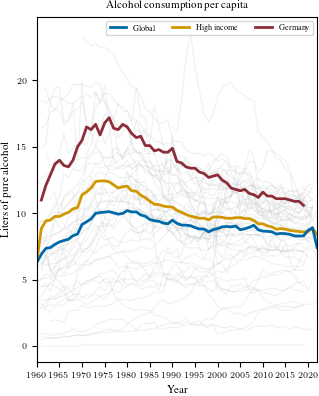

In [15]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    alcohol_df_wrld, 
    xticks = 5, 
    year_column="TIME",
    output_fig_path = OUTPUT_PATH + "fig_AlcoholConsumptionPerCapita.pdf",
    xlabel = 'Year',
    ylabel = "Liters of pure alcohol",
    title = "Alcohol consumption per capita")